In [9]:
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
import folium

In [64]:
sns.set(style="whitegrid", palette="Set2", font_scale=1.3)

# Read the dataset

Source: 

 - [Kaggle](https://www.kaggle.com/chetanism/foursquare-nyc-and-tokyo-checkin-dataset/version/2)
 - [yangdingqi](https://sites.google.com/site/yangdingqi/home/foursquare-dataset)

In [4]:
checkins_df = pd.read_csv("../data/dataset_TSMC2014_NYC.csv")

In [113]:
restaurant_categories = pd.read_csv("../data/restaurants.txt", header=None)
restaurant_categories.columns = ["venueCategory"]

# Exploratory data analysis

## Overall dataset

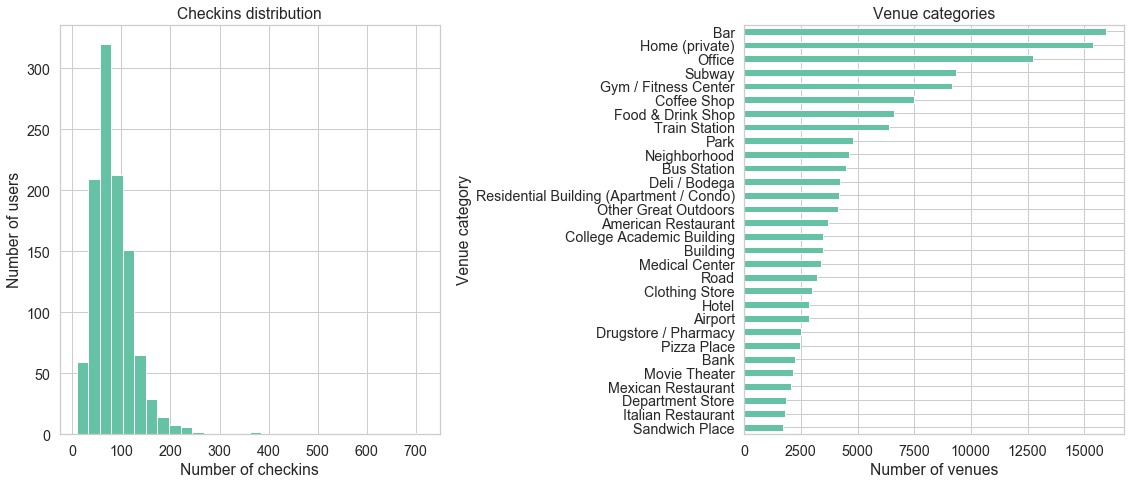

In [94]:
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(16, 7))


# Checkins distribution
ax = axs[0]

checkins_df\
    .groupby("userId")["venueId"]\
    .nunique()\
    .plot\
    .hist(bins=30,
          ax=ax)

ax.set_xlabel("Number of checkins")
ax.set_ylabel("Number of users")
ax.set_title("Checkins distribution")

# Checkins distribution
ax = axs[1]
checkins_df["venueCategory"]\
    .value_counts()\
    .head(30)\
    .sort_values()\
    .plot(kind="barh", 
          ax=ax)

ax.set_xlabel("Number of venues")
ax.set_ylabel("Venue category")
ax.set_title("Venue categories")

plt.tight_layout()
plt.show()

## Restaurants only

In [116]:
checkins_restaurants_df = checkins_df.merge(restaurant_categories)

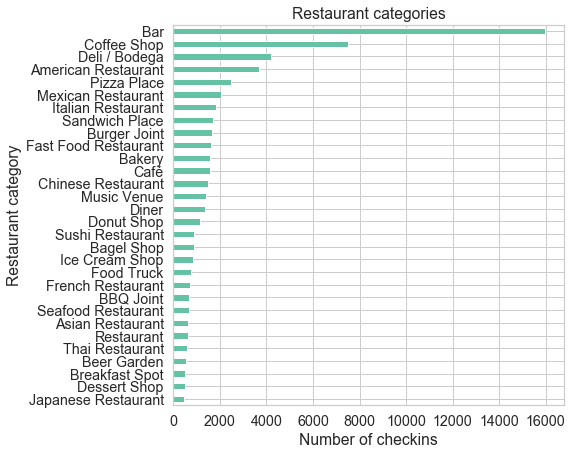

In [139]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(7, 7))

checkins_restaurants_df["venueCategory"]\
    .value_counts()\
    .head(30)\
    .sort_values()\
    .plot(kind="barh", 
          ax=ax)

ax.set_xlabel("Number of checkins")
ax.set_ylabel("Restaurant category")
ax.set_title("Restaurant categories")

plt.show()

## Home only

In [117]:
checkins_home_df = checkins_df.loc[checkins_df["venueCategory"] == "Home (private)"]

# Map 

In [133]:
m = folium.Map(
    location=[40.7128, -74.0060],
    zoom_start=11
)

# Home
for _, row in checkins_home_df.head(100).iterrows():
    marker = folium.Marker(
        location=[row.latitude, row.longitude],
        icon=folium.Icon(
            icon="fa-home",
            prefix="fa"
        )
    )
    
    marker.add_to(m)
    
# Restaurants
for _, row in checkins_restaurants_df.head(100).iterrows():
    marker = folium.Marker(
        location=[row.latitude, row.longitude],
        icon=folium.Icon(
            icon="fa-cutlery",
            prefix="fa",
            color="red"
        )
    )
    
    marker.add_to(m)

In [134]:
m